<a href="https://colab.research.google.com/github/MicahShaw/quantum-projects/blob/main/Qiskit(Shor_9_ECC)%20Micah%20Shaw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Quantum Error Correction: Shor 9-*qubit* Code explained by** *Micah Shaw*



In [ ]:
#Micah Shaw (UMD College Park)
#Qiskit-Phase Shor-9 ECC Code
#Necessary Imports

#Suppress !pip output.
%%capture
!pip install qiskit
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit
import matplotlib.pyplot as plt

#Step One, ***Setting up the Circuit***

*Setup Explained*


> The Shor-9 qubit code makes use of nine-qubits to correct both phase and bit flip errors. Essentially, it combines the previous phase and bit flip codes.





In [ ]:
quantum_register = QuantumRegister(9, 'qregister')
#Need classical register to measure the result. We will not perform a measurement here however!
classical_register = ClassicalRegister(1, 'cregister')
#Create circuit, Nine Qubits, One Classical Bit
quantum_circuit = QuantumCircuit(quantum_register, classical_register)

# **Phase Flip Prep (Apply Hadamard)**
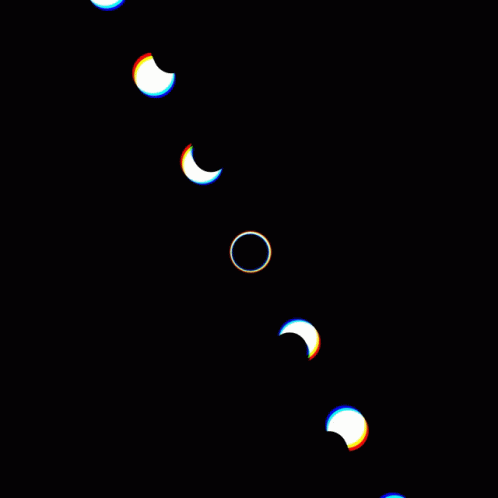



#Step Two, ***Applying the CNOT Gates***


> Transfer state of original qubit to third and sixth qubits.



In [ ]:
%%capture
quantum_circuit.cx(quantum_register[0], quantum_register[3])
quantum_circuit.cx(quantum_register[0], quantum_register[6])

#Step Three, ***Place qubits into superposition***


# *Hadamard Gate*


> We can use the Hadamard gate here for superposition.



In [ ]:
%%capture
quantum_circuit.h(quantum_register[0])
quantum_circuit.h(quantum_register[3])
quantum_circuit.h(quantum_register[6])

#Step Four, ***Applying the CNOT Gates***


> Transfer state of superposition qubits to the ancillary qubits one and two levels below them.



In [ ]:
%%capture
#QUBIT ONE
quantum_circuit.cx(quantum_register[0], quantum_register[1])
quantum_circuit.cx(quantum_register[0], quantum_register[2])

#QUBIT THREE
quantum_circuit.cx(quantum_register[3], quantum_register[4])
quantum_circuit.cx(quantum_register[3], quantum_register[5])

#QUBIT SIX
quantum_circuit.cx(quantum_register[6], quantum_register[7])
quantum_circuit.cx(quantum_register[6], quantum_register[8])

#Step Five, ***Simulate a noisy channel with a bit and phase flip***

```
#We can simluate a phase flip with a Pauli-Z gate.
#We can simulate a bit flip with a Pauli-X gate.
```
# *Pauli-Z Gate*


> Performs a rotation around the Z-axis of the Bloch sphere. |0> to |0>, |1> to -|1>.

# *Pauli-X Gate*
> Flips the state of the qubit, |0> to |1>, |1> to |0>.



In [ ]:
%%capture
quantum_circuit.x(quantum_register[0])
quantum_circuit.z(quantum_register[0])
#separate sections with .barrier
quantum_circuit.barrier(quantum_register)

#Step Four, ***Repeat CNOT Gate application,***



> This is used to store the singular qubit states if a bit flip / phase flip occcurred.






In [ ]:
%%capture
#QUBIT ONE
quantum_circuit.cx(quantum_register[0], quantum_register[1])
quantum_circuit.cx(quantum_register[0], quantum_register[2])

#QUBIT THREE
quantum_circuit.cx(quantum_register[3], quantum_register[4])
quantum_circuit.cx(quantum_register[3], quantum_register[5])

#QUBIT SIX
quantum_circuit.cx(quantum_register[6], quantum_register[7])
quantum_circuit.cx(quantum_register[6], quantum_register[8])

#Step Five, ***Correct the Bit FLIP***

```
#We can correct the flip with a TOFFOLI gate.
```
> If C-one and C-two are one, flips the target qubit.


***Intermission, Toffoli Gate Explained***



> A Toffoli Gate is a multi-qubit gate which is simliar to the
CNOT gate, where intstead of one control qubit and one target qubit, it maintains two control qubits. We use this in QEC to correct the bit flip.




In [ ]:
quantum_circuit.ccx(quantum_register[2], quantum_register[1], quantum_register[0])
quantum_circuit.ccx(quantum_register[5], quantum_register[4], quantum_register[3])
quantum_circuit.ccx(quantum_register[8], quantum_register[7], quantum_register[6])
print(quantum_circuit)

                       ┌───┐          ┌───┐┌───┐ ░           ┌───┐
qregister_0: ──■────■──┤ H ├──■────■──┤ X ├┤ Z ├─░───■────■──┤ X ├
               │    │  └───┘┌─┴─┐  │  └───┘└───┘ ░ ┌─┴─┐  │  └─┬─┘
qregister_1: ──┼────┼───────┤ X ├──┼─────────────░─┤ X ├──┼────■──
               │    │       └───┘┌─┴─┐           ░ └───┘┌─┴─┐  │  
qregister_2: ──┼────┼────────────┤ X ├───────────░──────┤ X ├──■──
             ┌─┴─┐  │  ┌───┐     └───┘           ░      └───┘┌───┐
qregister_3: ┤ X ├──┼──┤ H ├──■────■─────────────░───■────■──┤ X ├
             └───┘  │  └───┘┌─┴─┐  │             ░ ┌─┴─┐  │  └─┬─┘
qregister_4: ───────┼───────┤ X ├──┼─────────────░─┤ X ├──┼────■──
                    │       └───┘┌─┴─┐           ░ └───┘┌─┴─┐  │  
qregister_5: ───────┼────────────┤ X ├───────────░──────┤ X ├──■──
                  ┌─┴─┐┌───┐     └───┘           ░      └───┘┌───┐
qregister_6: ─────┤ X ├┤ H ├──■────■─────────────░───■────■──┤ X ├
                  └───┘└───┘┌─┴─┐  │             ░ ┌─┴─┐  │  └

#Step Six, ***Repeat hadamard step to bring qubits out of superposition***

In [ ]:
%%capture
quantum_circuit.h(quantum_register[0])
quantum_circuit.h(quantum_register[3])
quantum_circuit.h(quantum_register[6])

#Step Seven, ***Phase Flip Correction***

In [ ]:
quantum_circuit.cx(quantum_register[0], quantum_register[3])
quantum_circuit.cx(quantum_register[0], quantum_register[6])
quantum_circuit.ccx(quantum_register[6], quantum_register[3], quantum_register[0])
quantum_circuit.barrier(quantum_register)
print(quantum_circuit)

                       ┌───┐          ┌───┐┌───┐ ░           ┌───┐┌───┐     »
qregister_0: ──■────■──┤ H ├──■────■──┤ X ├┤ Z ├─░───■────■──┤ X ├┤ H ├──■──»
               │    │  └───┘┌─┴─┐  │  └───┘└───┘ ░ ┌─┴─┐  │  └─┬─┘└───┘  │  »
qregister_1: ──┼────┼───────┤ X ├──┼─────────────░─┤ X ├──┼────■─────────┼──»
               │    │       └───┘┌─┴─┐           ░ └───┘┌─┴─┐  │         │  »
qregister_2: ──┼────┼────────────┤ X ├───────────░──────┤ X ├──■─────────┼──»
             ┌─┴─┐  │  ┌───┐     └───┘           ░      └───┘┌───┐┌───┐┌─┴─┐»
qregister_3: ┤ X ├──┼──┤ H ├──■────■─────────────░───■────■──┤ X ├┤ H ├┤ X ├»
             └───┘  │  └───┘┌─┴─┐  │             ░ ┌─┴─┐  │  └─┬─┘└───┘└───┘»
qregister_4: ───────┼───────┤ X ├──┼─────────────░─┤ X ├──┼────■────────────»
                    │       └───┘┌─┴─┐           ░ └───┘┌─┴─┐  │            »
qregister_5: ───────┼────────────┤ X ├───────────░──────┤ X ├──■────────────»
                  ┌─┴─┐┌───┐     └───┘           ░      └───┘┌──